# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Dataset

In [2]:
df = pd.read_csv("technical_support_data-2.csv")

In [3]:
df

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,170,1.3,32,0.04,0.00,75,25
1,power chord does not tightly fit,12,2.0,150,0.01,0.50,5,95
2,Fan swing not working,5,1.0,35,0.02,0.20,90,10
3,Main switch does not on,3,2.0,8,0.01,0.70,5,95
4,Forgot mobile app password,45,2.3,54,0.15,0.00,99,1
5,AC stops abruptly,47,3.1,132,0.30,0.03,100,0
6,App hangs while entring commands,12,4.0,154,0.02,0.05,100,0
7,App takes a long time to initialize,165,1.2,32,0.03,0.00,95,5
8,Unable to connect the App to the device,321,1.0,5,0.21,0.00,60,40
9,Reinstalling the app hangs the phone,22,3.3,140,0.14,0.01,95,5


In [4]:
df.shape

(23, 8)

In [5]:
df_attributes = df[df.columns[1:]]

In [6]:
from scipy.stats import zscore
df_attributes_scaled = df_attributes.apply(zscore)

In [7]:
df_attributes_scaled.head()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,0.179429,-0.701207,-0.538351,-0.843188,-0.561463,0.138067,-0.138067
1,-0.862176,0.027143,1.510857,-1.101765,2.245854,-1.778204,1.778204
2,-0.908323,-1.013357,-0.486253,-1.015573,0.561463,0.548696,-0.548696
3,-0.921508,0.027143,-0.955140,-1.101765,3.368781,-1.778204,1.778204
4,-0.644625,0.339294,-0.156296,0.104930,-0.561463,0.795074,-0.795074


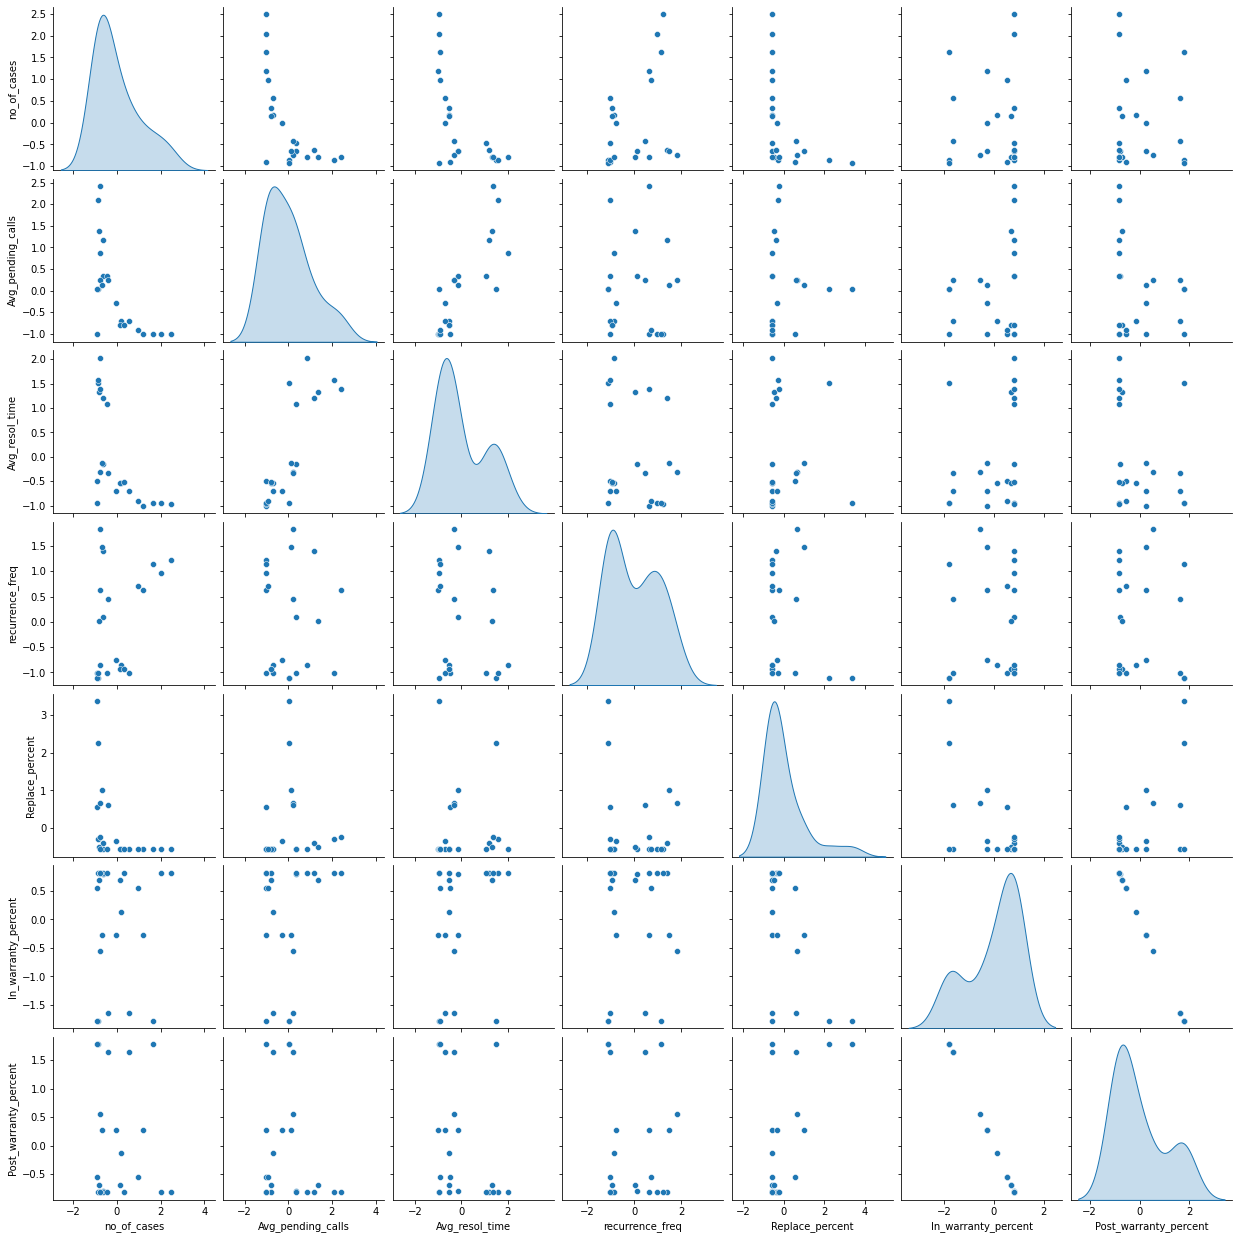

In [8]:
sns.pairplot(df_attributes_scaled, diag_kind="kde")

# Machine Learning

### Group Data into similar Clusters

In [17]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

In [74]:
clusters = range(1, 10)
mean_distortions = []
for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(df_attributes_scaled)
    mean_distortions.append(sum(np.min(cdist(df_attributes_scaled, model.cluster_centers_, metric="euclidean"), axis=1)) / df_attributes_scaled.shape[0])
    # mean_distortions.append(np.min(cdist(df_attributes_scaled, model.cluster_centers_, metric="euclidean"), axis=1).mean())

In [75]:
mean_distortions

[2.8061521016608784,
 2.224337941799935,
 1.9221181374847787,
 1.520164752124916,
 1.225571112764852,
 1.0683763656941436,
 0.9899330409363389,
 0.8786949034427735,
 0.7881420217603765]

Text(0.5, 1.0, 'Selecting k with the Elbow method')

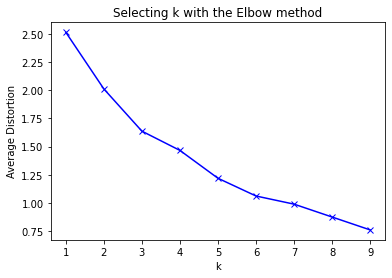

In [21]:
plt.plot(clusters, mean_distortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow method")

### k = 3

In [22]:
km3 = KMeans(3)
km3.fit(df_attributes_scaled)
prediction3 = km3.predict(df_attributes_scaled)

In [47]:
df["Group"] = prediction3
df_attributes_scaled["Group"] = prediction3

In [48]:
df[df["Group"] == 0]

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,Group
4,Forgot mobile app password,45,2.3,54,0.15,0.00,99,1,0
5,AC stops abruptly,47,3.1,132,0.30,0.03,100,0,0
6,App hangs while entring commands,12,4.0,154,0.02,0.05,100,0,0
9,Reinstalling the app hangs the phone,22,3.3,140,0.14,0.01,95,5,0
10,Mobile screen blanks on use of phone,23,4.3,143,0.21,0.06,100,0,0
13,AC remote does not work,24,2.8,180,0.04,0.00,100,0,0
18,Factory settings not working,72,2.3,125,0.02,0.00,100,0,0


In [49]:
df.groupby(by="Group").mean()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
Group,,,,,,,
0,35.000000,3.157143,132.571429,0.125714,0.021429,99.142857,0.857143
1,250.444444,1.166667,20.666667,0.125556,0.026667,85.555556,14.444444
2,112.142857,1.828571,47.857143,0.165714,0.272857,20.714286,79.285714


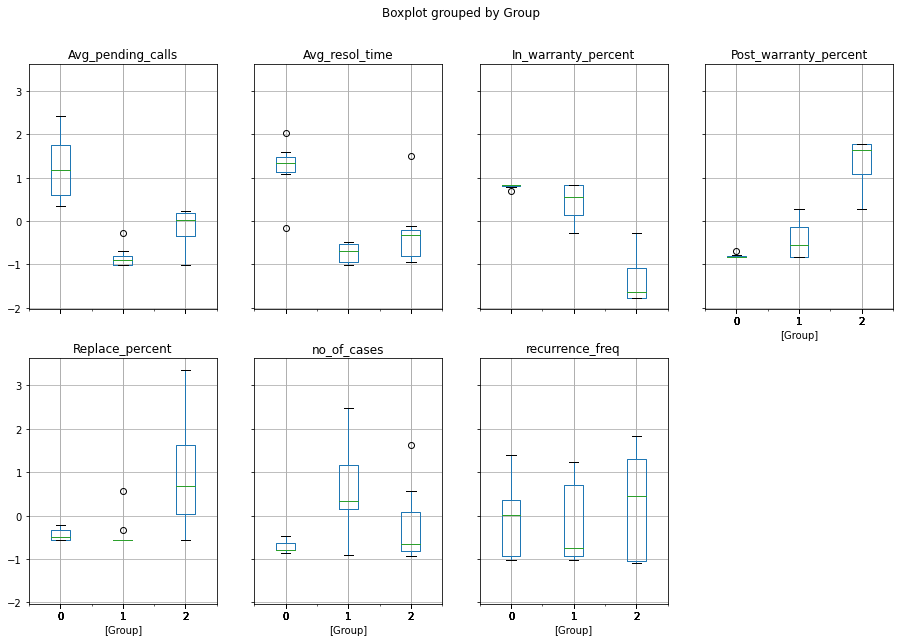

In [50]:
df_attributes_scaled.boxplot(by="Group", figsize=(15, 10), layout=(2, 4));

### k = 5

In [37]:
km5 = KMeans(5)
km5.fit(df_attributes_scaled.drop("Group", axis=1))
prediction5 = km5.predict(df_attributes_scaled.drop("Group", axis=1))

In [51]:
df["Group"] = prediction5
df_attributes_scaled["Group"] = prediction5

In [52]:
df[df["Group"] == 0]

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,Group
0,Temperature control not working,170,1.3,32,0.04,0.00,75,25,0
2,Fan swing not working,5,1.0,35,0.02,0.20,90,10,0
7,App takes a long time to initialize,165,1.2,32,0.03,0.00,95,5,0
12,AC controller sofware missing,193,1.2,33,0.03,0.00,100,0,0
17,Freshner holder stuck,140,1.7,23,0.05,0.04,60,40,0


In [53]:
df.groupby(by="Group").mean()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
Group,,,,,,,
0,134.60,1.280000,31.000000,0.034000,0.048000,84.000000,16.000000
1,35.00,3.157143,132.571429,0.125714,0.021429,99.142857,0.857143
2,154.00,1.760000,35.400000,0.228000,0.142000,27.000000,73.000000
3,395.25,1.025000,7.750000,0.240000,0.000000,87.500000,12.500000
4,7.50,2.000000,79.000000,0.010000,0.600000,5.000000,95.000000


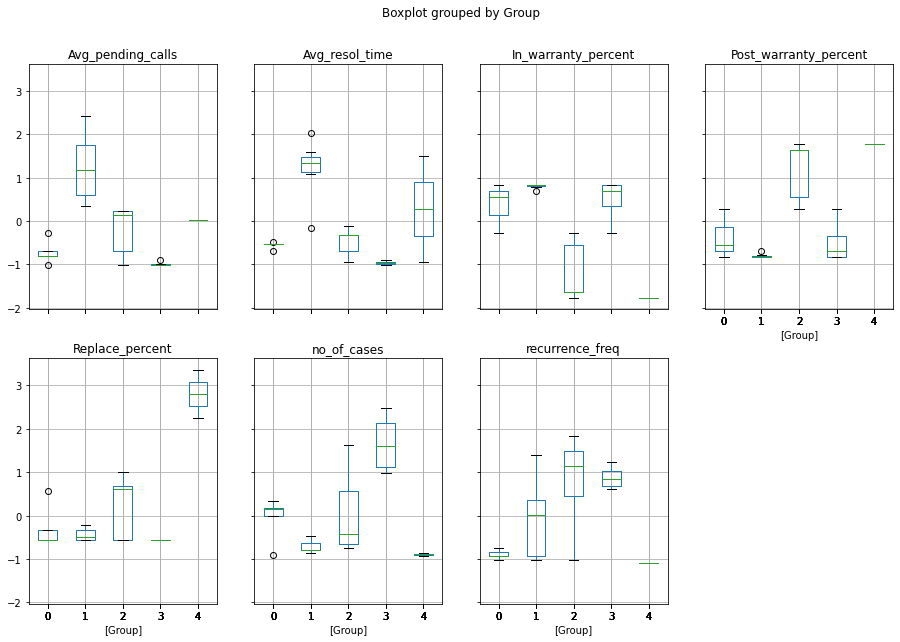

In [55]:
df_attributes_scaled.boxplot(by="Group", figsize=(15, 10), layout=(2, 4));